## Notebook for creating figures from the Sobol' data

With the python script ``Sobol'.py``, the model is evaluated for parameter settings taken from a Saltelli sample (of Sobol' sequences) over $d=5$ parameters for $N=512$, resulting in $N(5+2)=3584$ model evaluations. This is repeated 10 times. From the data, sets of sensitivity indices are made.

In [19]:
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt

### All runs combined

In [20]:
problem = { 'fungus_decay_rate': [float, [0.001, 0.02]], 
            'energy_biomass_cvn': [float, [1, 4]], 
            'fungus_larvae_cvn': [float, [0.55, 1.25]],
            'caretaker_carrying_amount': [float, [0.5, 1.35]],
            'caretaker_roundtrip_mean': [float, [5, 12]]
}

# SALib's saltelli sampler wants it in another format so here we go
problem_sampler = {
    'num_vars': len(problem),
    'names': [key for key in sorted(problem.keys())],
    'bounds': [problem[key][1] for key in sorted(problem.keys())]
}

model_reporters = {"Ants_Biomass": "track_ants",
                   "Fungus_Biomass": "fungus_biomass",
                   "Fraction forager ants": "track_ratio_foragers",
                   "Available leaves": "track_leaves",
                   "Dormant caretakers fraction": "track_dormant_ants",
                   "Ants with leaves": "track_ants_leaves",
}

# dictionary for relabeling
param_names = {'num_ants': r'Initial number of ants $A(0)$',
            'num_plants': r'Number of plants $P(0)$', 
            'pheromone_lifespan': r'Pheromone lifespan $T_p$',
            'num_plant_leaves': r'Leaves per plant $P_L(O)$',
            'initial_foragers_ratio': r'Initial fraction of foragers $\pi_f(0)$', 
           'leaf_regrowth_rate': r'Leaf regrowth rate $L_{growth}$',
            'ant_death_probability': r'Ant death probability $d_A$',
            'initial_fungus_energy': r'Initial fungus energy $F(0)$',
            'fungus_decay_rate': r'Fungus decay rate $d_F$', 
            'energy_biomass_cvn': r'Leaf-fungus conversion $c_F$', 
           'fungus_larvae_cvn': r'Fungus-larvae conversion $c_A$',
            'max_fitness_queue_size': r'Moran process memory $K$',
            'caretaker_carrying_amount': r'Caretaker carrying amount $F_C$',
            'dormant_roundtrip_mean': r'Dormancy duration mean $\mu_D$',
            'caretaker_roundtrip_mean': r'Round-trip duration mean $\mu_R$',
}

param_names_short = {'num_ants': r'$A(0)$',
            'num_plants': r'$P(0)$', 
            'pheromone_lifespan': r'$T_p$',
            'num_plant_leaves': r'$P_L(O)$',
            'initial_foragers_ratio': r'$\pi_f(0)$', 
           'leaf_regrowth_rate': r'$L_{growth}$',
            'ant_death_probability': r'$d_A$',
            'initial_fungus_energy': r'$F(0)$',
            'fungus_decay_rate': r'$d_F$', 
            'energy_biomass_cvn': r'$c_F$', 
           'fungus_larvae_cvn': r'$c_A$',
            'max_fitness_queue_size': r'$K$',
            'caretaker_carrying_amount': r'$F_C$',
            'dormant_roundtrip_mean': r'$\mu_D$',
            'caretaker_roundtrip_mean': r'$\mu_R$',
}


output_names = {"Ants_Biomass": r'Number of Ants $A(t)$',
                   "Fungus_Biomass": r'Fungus biomass $F(t)$',
                   "Fraction forager ants": r'Fraction forager ants $\pi_f(t)$',
                   "Dormant caretakers fraction": r'Fraction dormant $\pi_{c_D}(t)$',
                   "Death reason": r"Fraction of extinct runs",
               }



In [21]:
results_combined = np.zeros((512*7*10, 6))

results_all = []

for run in range(1,11):
    # get results
    data = np.load(f'data/Sobol/ripper/run_{run}.npz', allow_pickle=True)
    results_all.append(data['results'][()])

    
# trying to combine the results in correct order
counter = 0
for ix in range(512*7):
    for run in range(10):
#         print(results_all[run][ix])
        results_combined[counter] = results_all[run][ix]
    counter += 1

    
# print(results_combined[:,3])
# print(sum(results_combined[:,3]))

Si_all_combined = {}

for i, key in enumerate(sorted(model_reporters.keys())):
    print(' ')
    print('Model output:', key)
    Si_all_combined[key] = sobol.analyze(problem_sampler, results_combined[:,i], calc_second_order=False, print_to_console=True, seed=546)


# Si = 'Ants_Biomass'
# #First order
# plot_index(Si_all_combined[Si], problem['names'], '1', 'First order sensitivity')
# plt.show()

# # Total order
# plot_index(Si_all_combined[Si], problem['names'], 'T', 'Total order sensitivity')
# plt.show()

# Si = 'Dormant caretakers fraction'
# #First order
# plot_index(Si_all_combined[Si], problem['names'], '1', 'First order sensitivity')
# plt.show()

# # Total order
# plot_index(Si_all_combined[Si], problem['names'], 'T', 'Total order sensitivity')
# plt.show()

# Si = 'Fraction forager ants'
# #First order
# plot_index(Si_all_combined[Si], problem['names'], '1', 'First order sensitivity')
# plt.show()

# # Total order
# plot_index(Si_all_combined[Si], problem['names'], 'T', 'Total order sensitivity')
# plt.show()

 
Model output: Ants with leaves
                                 ST   ST_conf
caretaker_carrying_amount  0.601649  0.118505
caretaker_roundtrip_mean   0.470661  0.087621
energy_biomass_cvn         0.500205  0.082839
fungus_decay_rate          0.532434  0.088095
fungus_larvae_cvn          0.628643  0.103417
                                 S1   S1_conf
caretaker_carrying_amount  0.032723  0.104318
caretaker_roundtrip_mean   0.000176  0.079494
energy_biomass_cvn        -0.057479  0.085508
fungus_decay_rate          0.028027  0.089672
fungus_larvae_cvn          0.077465  0.093353
 
Model output: Ants_Biomass
                                 ST   ST_conf
caretaker_carrying_amount  0.558089  0.162363
caretaker_roundtrip_mean   0.402184  0.114545
energy_biomass_cvn         0.533679  0.109388
fungus_decay_rate          0.504055  0.126761
fungus_larvae_cvn          0.665099  0.143153
                                 S1   S1_conf
caretaker_carrying_amount  0.016716  0.084213
caretaker_roundtri

In [22]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title, fontsize=14)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.xlim([-0.2, 1])
    
#     yticklabels = [param_names_short[param] for param in params]
    yticklabels = [param_names[param] for param in params]
    
    plt.yticks(range(l), yticklabels, fontsize=15)
    plt.xticks(fontsize=12)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

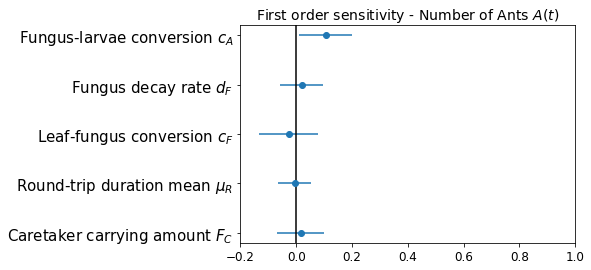

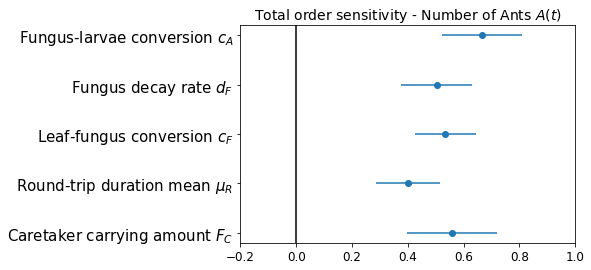

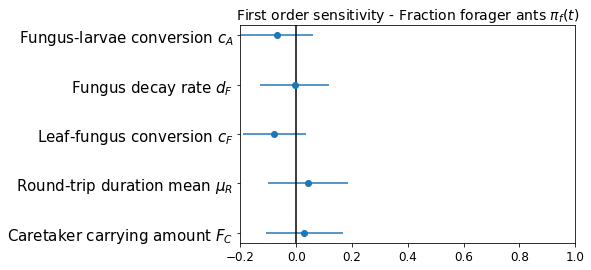

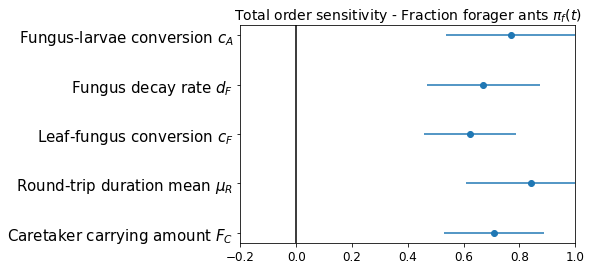

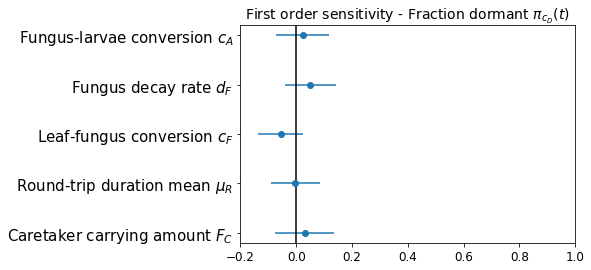

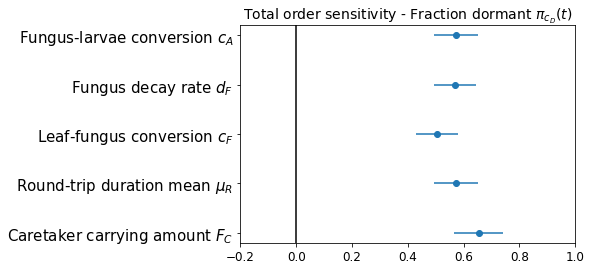

In [23]:
Si = 'Ants_Biomass'
#First order
plot_index(Si_all_combined[Si], problem_sampler['names'], '1', 
           f'First order sensitivity - {output_names[Si]}' )
plt.show()

# Total order
plot_index(Si_all_combined[Si], problem_sampler['names'], 'T', 
           f'Total order sensitivity - {output_names[Si]}')
plt.show()

Si = 'Fraction forager ants'
#First order
plot_index(Si_all_combined[Si], problem_sampler['names'], '1', 
           f'First order sensitivity - {output_names[Si]}')
plt.show()

# Total order
plot_index(Si_all_combined[Si], problem_sampler['names'], 'T', 
           f'Total order sensitivity - {output_names[Si]}')
plt.show()

Si = 'Dormant caretakers fraction'
#First order
plot_index(Si_all_combined[Si], problem_sampler['names'], '1', 
           f'First order sensitivity - {output_names[Si]}')
plt.show()

# Total order
plot_index(Si_all_combined[Si], problem_sampler['names'], 'T', 
           f'Total order sensitivity - {output_names[Si]}')
plt.show()

## Getting the sensitivity indices for each repetition and then comparing



In [34]:
# results_all got the model evaluations for each run

In [24]:
Si_repetition = {}


for run in range(10):
    
    Si_all = {}
    for i, key in enumerate(sorted(model_reporters.keys())):
        resulties = results_all[run]
        Si_all[key] = sobol.analyze(problem_sampler, resulties[:,i], calc_second_order=False, print_to_console=False, seed=546)
    
    Si_repetition[run] = Si_all

In [47]:
def plot_index_all(s, params, i, ax, r=0, title='', short=True, xlabel=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """
    indices = s['S' + i]
    errors = s['S' + i + '_conf']
    
    epsilon=0.07
    
    l = len(indices)

    ax.set_title(title, fontsize=14)
    ax.set_ylim([-0.8, len(indices) - 1 + 0.2])
    ax.set_xlim([-0.2, 1])
    ax.set_xlabel(xlabel, fontsize=14)
    if short:
        yticklabels = [param_names_short[param] for param in params]
        ax.set_yticks(range(l))
        ax.set_yticklabels(yticklabels, fontsize=15)
    else:
        yticklabels = [param_names[param] for param in params]
    
        ax.set_yticks(range(l))
        ax.set_yticklabels(yticklabels, fontsize=13)
    
    y_pos = [number-epsilon*(r) for number in range(l)]
    ax.errorbar(indices, y_pos, xerr=errors, linestyle='None', marker='o')
    ax.axvline(0, c='k')
    




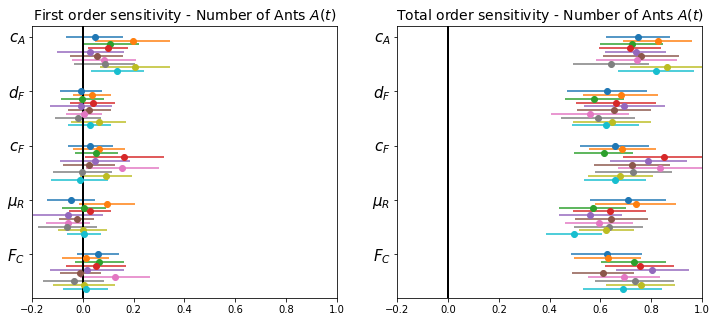

In [48]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

Si = 'Ants_Biomass'

for run in range(10):
    #First order
    plot_index_all(Si_repetition[run][Si], problem_sampler['names'], '1', axs[0], run,
               f'First order sensitivity - {output_names[Si]}' )

for run in range(10):
    # Total order
    plot_index_all(Si_repetition[run][Si], problem_sampler['names'], 'T', axs[1], run,
               f'Total order sensitivity - {output_names[Si]}')
plt.show()

{'S1': array([ 0.01671608, -0.00557871, -0.02736099,  0.01970398,  0.10607819]), 'S1_conf': array([0.08421276, 0.06022897, 0.10655713, 0.07614809, 0.0945608 ]), 'ST': array([0.55808947, 0.40218391, 0.53367915, 0.50405515, 0.66509945]), 'ST_conf': array([0.16236286, 0.11454516, 0.10938784, 0.12676082, 0.14315329])}


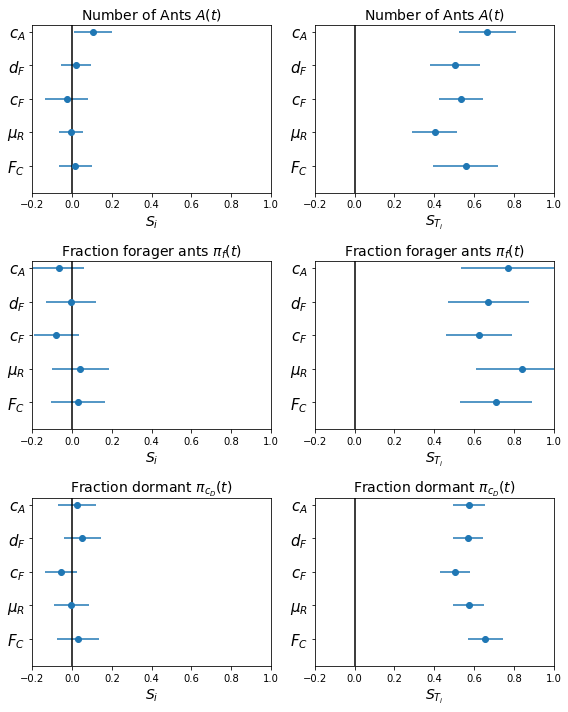

In [50]:
fig, axs = plt.subplots(3,2,figsize=(8, 10))

# Si = 'Ants_Biomass'
# #First order
# plot_index_all(Si_all_combined[Si], problem_sampler['names'], '1', axs[0,0], 
#            title=f'First order sensitivity - {output_names[Si]}', short=False, xlabel=r'$S_i$')


# # Total order
# plot_index_all(Si_all_combined[Si], problem_sampler['names'], 'T', axs[0,1],
#            title=f'Total order sensitivity - {output_names[Si]}', xlabel=r'$S_{T_i}$')


# Si = 'Fraction forager ants'
# #First order
# plot_index_all(Si_all_combined[Si], problem_sampler['names'], '1', axs[1,0],
#            title=f'First order sensitivity - {output_names[Si]}', short=False, xlabel=r'$S_i$')

# # Total order
# plot_index_all(Si_all_combined[Si], problem_sampler['names'], 'T', axs[1,1],
#            title=f'Total order sensitivity - {output_names[Si]}', xlabel=r'$S_{T_i}$')


# Si = 'Dormant caretakers fraction'
# #First order
# plot_index_all(Si_all_combined[Si], problem_sampler['names'], '1', axs[2,0],
#            title=f'First order sensitivity - {output_names[Si]}', short=False, xlabel=r'$S_i$')


# # Total order
# plot_index_all(Si_all_combined[Si], problem_sampler['names'], 'T', axs[2,1],
#            title=f'Total order sensitivity - {output_names[Si]}', xlabel=r'$S_{T_i}$')

# fig.tight_layout()



# summing the indices



short=True

Si = 'Ants_Biomass'
#First order

print(Si_all_combined[Si])

plot_index_all(Si_all_combined[Si], problem_sampler['names'], '1', axs[0,0], 
           title=f'{output_names[Si]}', short=short, xlabel=r'$S_i$')


# Total order
plot_index_all(Si_all_combined[Si], problem_sampler['names'], 'T', axs[0,1],
           title=f'{output_names[Si]}', xlabel=r'$S_{T_i}$')


Si = 'Fraction forager ants'
#First order
plot_index_all(Si_all_combined[Si], problem_sampler['names'], '1', axs[1,0],
           title=f'{output_names[Si]}', short=short, xlabel=r'$S_i$')

# Total order
plot_index_all(Si_all_combined[Si], problem_sampler['names'], 'T', axs[1,1],
           title=f'{output_names[Si]}', xlabel=r'$S_{T_i}$')


Si = 'Dormant caretakers fraction'
#First order
plot_index_all(Si_all_combined[Si], problem_sampler['names'], '1', axs[2,0],
           title=f'{output_names[Si]}', short=short, xlabel=r'$S_i$')


# Total order
plot_index_all(Si_all_combined[Si], problem_sampler['names'], 'T', axs[2,1],
           title=f'{output_names[Si]}', xlabel=r'$S_{T_i}$')

fig.tight_layout()
fig.savefig('figures/sobol_allrepetitions.pdf', bbox_inches='tight')